In [44]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
def animalDF(file):
    df = pd.read_csv(file)
    print(df.info())
    return df

In [46]:
animals = animalDF('files/train.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26729 entries, 0 to 26728
Data columns (total 10 columns):
AnimalID          26729 non-null object
Name              19038 non-null object
DateTime          26729 non-null object
OutcomeType       26729 non-null object
OutcomeSubtype    13117 non-null object
AnimalType        26729 non-null object
SexuponOutcome    26728 non-null object
AgeuponOutcome    26711 non-null object
Breed             26729 non-null object
Color             26729 non-null object
dtypes: object(10)
memory usage: 2.0+ MB
None


In [47]:
def convert_to_numeric(df):
    for col in ['AnimalID','Name', 'DateTime', 'OutcomeSubtype', 'AnimalType', 'SexuponOutcome',
                'Breed', 'Color', 'OutcomeType', 'AgeuponOutcome']:
        if col in df.columns:
            _col = "_%s" % (col)
            values = df[col].unique()
            _values = dict(zip(values, range(len(values))))
            df[_col] = df[col].map(_values).astype(int)
            df = df.drop(col, axis = 1)
    return df

animalPCA = convert_to_numeric(animals)

## Exploratory

### Missing Data

In [48]:
animals.isnull().any(axis=0)

AnimalID          False
Name               True
DateTime          False
OutcomeType       False
OutcomeSubtype     True
AnimalType        False
SexuponOutcome     True
AgeuponOutcome     True
Breed             False
Color             False
_AnimalID         False
dtype: bool

Here we can see that the columns 'Name', 'OutcomeSubtype', 'SexuponOutcome', and 'AgeuponOutcome' all have missing values. 

In [49]:
animals['Name'] = animals['Name'].fillna('No name')
animals['OutcomeSubtype'] = animals['OutcomeSubtype'].fillna('Unknown')
animals['SexuponOutcome'] = animals['SexuponOutcome'].fillna('Unknown')
animals['AgeuponOutcome'] = animals['AgeuponOutcome'].fillna('1 year')

In [50]:
animals = animals.drop('_AnimalID', axis=1)

First I would like to see the different type of animals that are in this data set, as well as their outcomes.

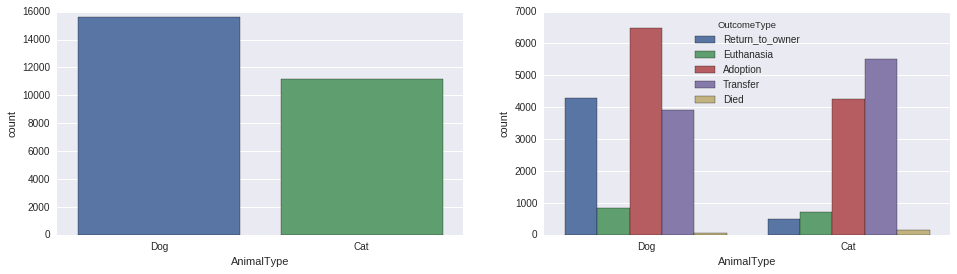

In [51]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))
sns.countplot(data=animals, x='AnimalType', ax=ax1)
sns.countplot(data=animals, x='AnimalType', hue='OutcomeType',ax=ax2)

Here we can see that the only two types of animals that are in this data set are dogs and cats. According to the graph, we can see that both dogs and cats are likely to be adopted or transferred. It also seems that dogs are more likely to be returned to it's owners.

In [52]:
def colorSplit(x):
    x = str(x)
    
    if x.find('/') >= 0:
        split = x.split('/')
        return split[0]
    else:
        return x
    

In [53]:
def colorSplit1(x):
    x = str(x)
    if x.find(' ') >= 0 or x.find(' ') == True:
        split = x.split(' ')
        return split[0]
    else:
        return x

In [54]:
animals['Color'] = animals['Color'].apply(colorSplit)

In [55]:
animals['Color'] = animals['Color'].apply(colorSplit1)

In [56]:
animals['Color'].unique()

array(['Brown', 'Cream', 'Blue', 'Tan', 'Black', 'Red', 'White', 'Silver',
       'Orange', 'Chocolate', 'Calico', 'Torbie', 'Yellow', 'Tricolor',
       'Tortie', 'Gray', 'Buff', 'Seal', 'Fawn', 'Flame', 'Sable', 'Liver',
       'Apricot', 'Lynx', 'Lilac', 'Gold', 'Agouti', 'Pink', 'Ruddy'], dtype=object)

In [57]:
animals['Color'].value_counts()

Black        6646
Brown        5318
White        3344
Blue         2149
Tan          1674
Orange       1343
Red           871
Tricolor      800
Tortie        614
Calico        579
Cream         498
Chocolate     469
Torbie        398
Sable         324
Gray          278
Buff          267
Yellow        261
Fawn          209
Lynx          183
Seal          158
Silver         96
Flame          85
Gold           77
Lilac          39
Apricot        26
Liver          19
Agouti          2
Ruddy           1
Pink            1
Name: Color, dtype: int64

In [58]:
animals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26729 entries, 0 to 26728
Data columns (total 10 columns):
AnimalID          26729 non-null object
Name              26729 non-null object
DateTime          26729 non-null object
OutcomeType       26729 non-null object
OutcomeSubtype    26729 non-null object
AnimalType        26729 non-null object
SexuponOutcome    26729 non-null object
AgeuponOutcome    26729 non-null object
Breed             26729 non-null object
Color             26729 non-null object
dtypes: object(10)
memory usage: 2.0+ MB
